In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
refls = np.loadtxt('../EMIT-scenes/refl_1k.txt')
wv = np.loadtxt('../EMIT-scenes/wv_1k.txt')

In [19]:
df = pd.DataFrame(refls)
df['wv'] = wv

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,wv
0,0.204741,0.197175,0.191094,0.183757,0.176931,0.170667,0.163259,0.156790,0.149403,0.143051,...,0.008419,0.007556,0.006943,0.007534,0.006608,0.005288,0.005188,0.003175,0.002177,0.730501
1,0.212543,0.205032,0.198230,0.191868,0.185520,0.181054,0.175790,0.169040,0.163979,0.158545,...,0.031703,0.030989,0.016408,0.021509,0.018800,0.011752,0.009750,0.006126,0.003743,3.903775
2,0.257069,0.247040,0.239279,0.235955,0.229980,0.225172,0.220556,0.213525,0.208892,0.204352,...,0.048935,0.047420,0.036086,0.035361,0.032842,0.028992,0.024074,0.016344,0.010617,2.440262
3,0.228153,0.222575,0.218219,0.216051,0.211564,0.209291,0.206787,0.202573,0.200234,0.198054,...,0.019022,0.018087,0.010125,0.011289,0.010260,0.006571,0.005258,0.003041,0.001571,3.679452
4,0.207697,0.197579,0.187289,0.181697,0.174680,0.167442,0.160679,0.151619,0.145198,0.139652,...,0.006137,0.005005,0.004977,0.005275,0.004483,0.003734,0.003194,0.001900,0.001467,1.478675


In [23]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)
X_train.shape

(3500, 285)

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
y_pred = dt.predict(X_test)

Text(0.5, 1.0, 'Default Decision Tree Regression')

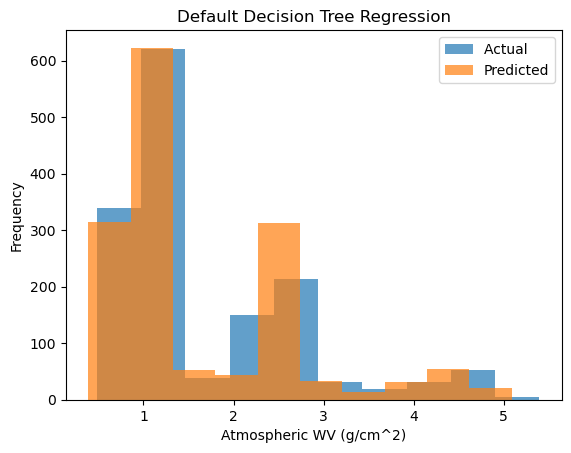

In [32]:
plt.hist(y_test, alpha = 0.7, label = 'Actual ')
plt.hist(y_pred, alpha = 0.7, label = 'Predicted')
plt.legend()
plt.xlabel('Atmospheric WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('Default Decision Tree Regression')

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [34]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
import pickle
file_name = '../default_scikit_rfr.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(rf, file)

In [38]:
y_pred = rf.predict(X_test)

Text(0.5, 1.0, 'Default SKL Random Forest')

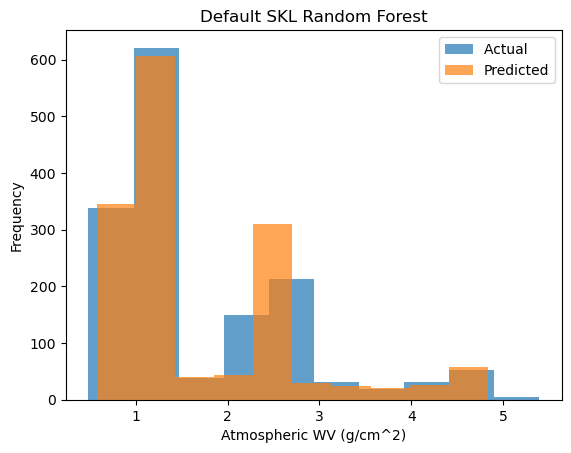

In [39]:
plt.hist(y_test, alpha = 0.7, label = 'Actual ')
plt.hist(y_pred, alpha = 0.7, label = 'Predicted')
plt.legend()
plt.xlabel('Atmospheric WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('Default SKL Random Forest')